# Task Description

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## About the Dataset

- Dataset Used - Bank Marketing
- Description - The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
- Columns - 
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y - has the client subscribed a term deposit? (binary: "yes","no") [Output Variable]


I. Introduction

1. Importing the packages

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from ydata_profiling import ProfileReport
from sklearn.metrics import confusion_matrix

2. Importing the dataset

In [42]:
df = pd.read_csv("./dataset/bank.csv", delimiter=";")

In [43]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [44]:
ProfileReport(df, title="Bank Marketing Data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### As there is no Null nor NaN values, data cleaning is not required.

# II. Decision Tree Implementation

Separating the dataset into Feature and Target columns

In [64]:
features = df.iloc[:,:-1]
names_of_features = df.iloc[:,:-1].columns

Perform one-hot encoding on the categorical columns

In [46]:
categorical_variables = features.select_dtypes(include=['object']).columns
df = pd.get_dummies(df,columns=categorical_variables, drop_first=True)
print(df)

      age  balance  day  duration  campaign  pdays  previous   y  \
0      30     1787   19        79         1     -1         0  no   
1      33     4789   11       220         1    339         4  no   
2      35     1350   16       185         1    330         1  no   
3      30     1476    3       199         4     -1         0  no   
4      59        0    5       226         1     -1         0  no   
...   ...      ...  ...       ...       ...    ...       ...  ..   
4516   33     -333   30       329         5     -1         0  no   
4517   57    -3313    9       153         1     -1         0  no   
4518   57      295   19       151        11     -1         0  no   
4519   28     1137    6       129         4    211         3  no   
4520   44     1136    3       345         2    249         7  no   

      job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0               False             False  ...      False      False      False   
1               False

Splitting the dataset into Training and Test sets

In [53]:
x = df.drop(columns=['y'])
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
4153   42      440    3        13         5     -1         0            False   
2085   33      -77   28       151         3     -1         0             True   
1891   32      656   20       148         2     -1         0            False   
3611   28      389   11        15         7     -1         0            False   
4015   36     5902   23       219         4     -1         0            False   
...   ...      ...  ...       ...       ...    ...       ...              ...   
4426   41     1536    4        54         2     -1         0            False   
466    34     -370   21       748         1     -1         0            False   
3092   46      523    6       105         4    366         2            False   
3772   47      440   21        71         4     -1         0            False   
860    58      309   19       156         2     -1         0             True   

      job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
4153             False          False  ...      False      False      False   
2085             False          False  ...       True      False      False   
1891             False          False  ...      False      False      False   
3611             False          False  ...      False      False      False   
4015             False          False  ...      False      False      False   
...                ...            ...  ...        ...        ...        ...   
4426             False          False  ...      False      False      False   
466              False          False  ...      False      False      False   
3092             False          False  ...      False      False      False   
3772             False          False  ...      False      False      False   
860              False          False  ...      False      False      False   

      month_may  month_nov  month_oct  month_sep  poutcome_other  \
4153      False      False      False      False           False   
2085      False      False      False      False           False   
1891      False      False      False      False           False   
3611       True      False      False      False           False   
4015       True      False      False      False           False   
...         ...        ...        ...        ...             ...   
4426       True      False      False      False           False   
466        True      False      False      False           False   
3092       True      False      False      False           False   
3772      False      False      False      False           False   
860       False      False      False      False           False   

      poutcome_success  poutcome_unknown  
4153             False              True  
2085             False              True  
1891             False              True  
3611             False              True  
4015             False              True  
...                ...               ...  
4426             False              True  
466              False              True  
3092             False             False  
3772             False              True  
860              False              True  

[3164 rows x 42 columns]

In [80]:
clf = DecisionTreeClassifier(max_depth=4)
clf1 = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

Truncated Version of the Whole Decision Tree for the ease of Visualization

[Text(0.5, 0.9, 'duration <= 561.0\ngini = 0.206\nsamples = 100.0%\nvalue = [0.883, 0.117]\nclass = y[0]'),
 Text(0.25, 0.7, 'poutcome_other <= 0.5\ngini = 0.142\nsamples = 89.3%\nvalue = [0.923, 0.077]\nclass = y[0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'month_nov <= 0.5\ngini = 0.114\nsamples = 86.8%\nvalue = [0.939, 0.061]\nclass = y[0]'),
 Text(0.0625, 0.3, 'duration <= 222.5\ngini = 0.103\nsamples = 85.4%\nvalue = [0.946, 0.054]\nclass = y[0]'),
 Text(0.03125, 0.1, 'gini = 0.044\nsamples = 57.3%\nvalue = [0.977, 0.023]\nclass = y[0]'),
 Text(0.09375, 0.1, 'gini = 0.21\nsamples = 28.1%\nvalue = [0.881, 0.119]\nclass = y[0]'),
 Text(0.1875, 0.3, 'duration <= 242.0\ngini = 0.498\nsamples = 1.4%\nvalue = [0.535, 0.465]\nclass = y[0]'),
 Text(0.15625, 0.1, 'gini = 0.391\nsamples = 0.9%\nvalue = [0.733, 0.267]\nclass = y[0]'),
 Text(0.21875, 0.1, 'gini = 0.142\nsamples = 0.4%\nvalue = [0.077, 0.923]\nclass = y[1]'),
 Text(0.375, 0.5, 'duration <= 146.5\ngini = 0.458\nsamples

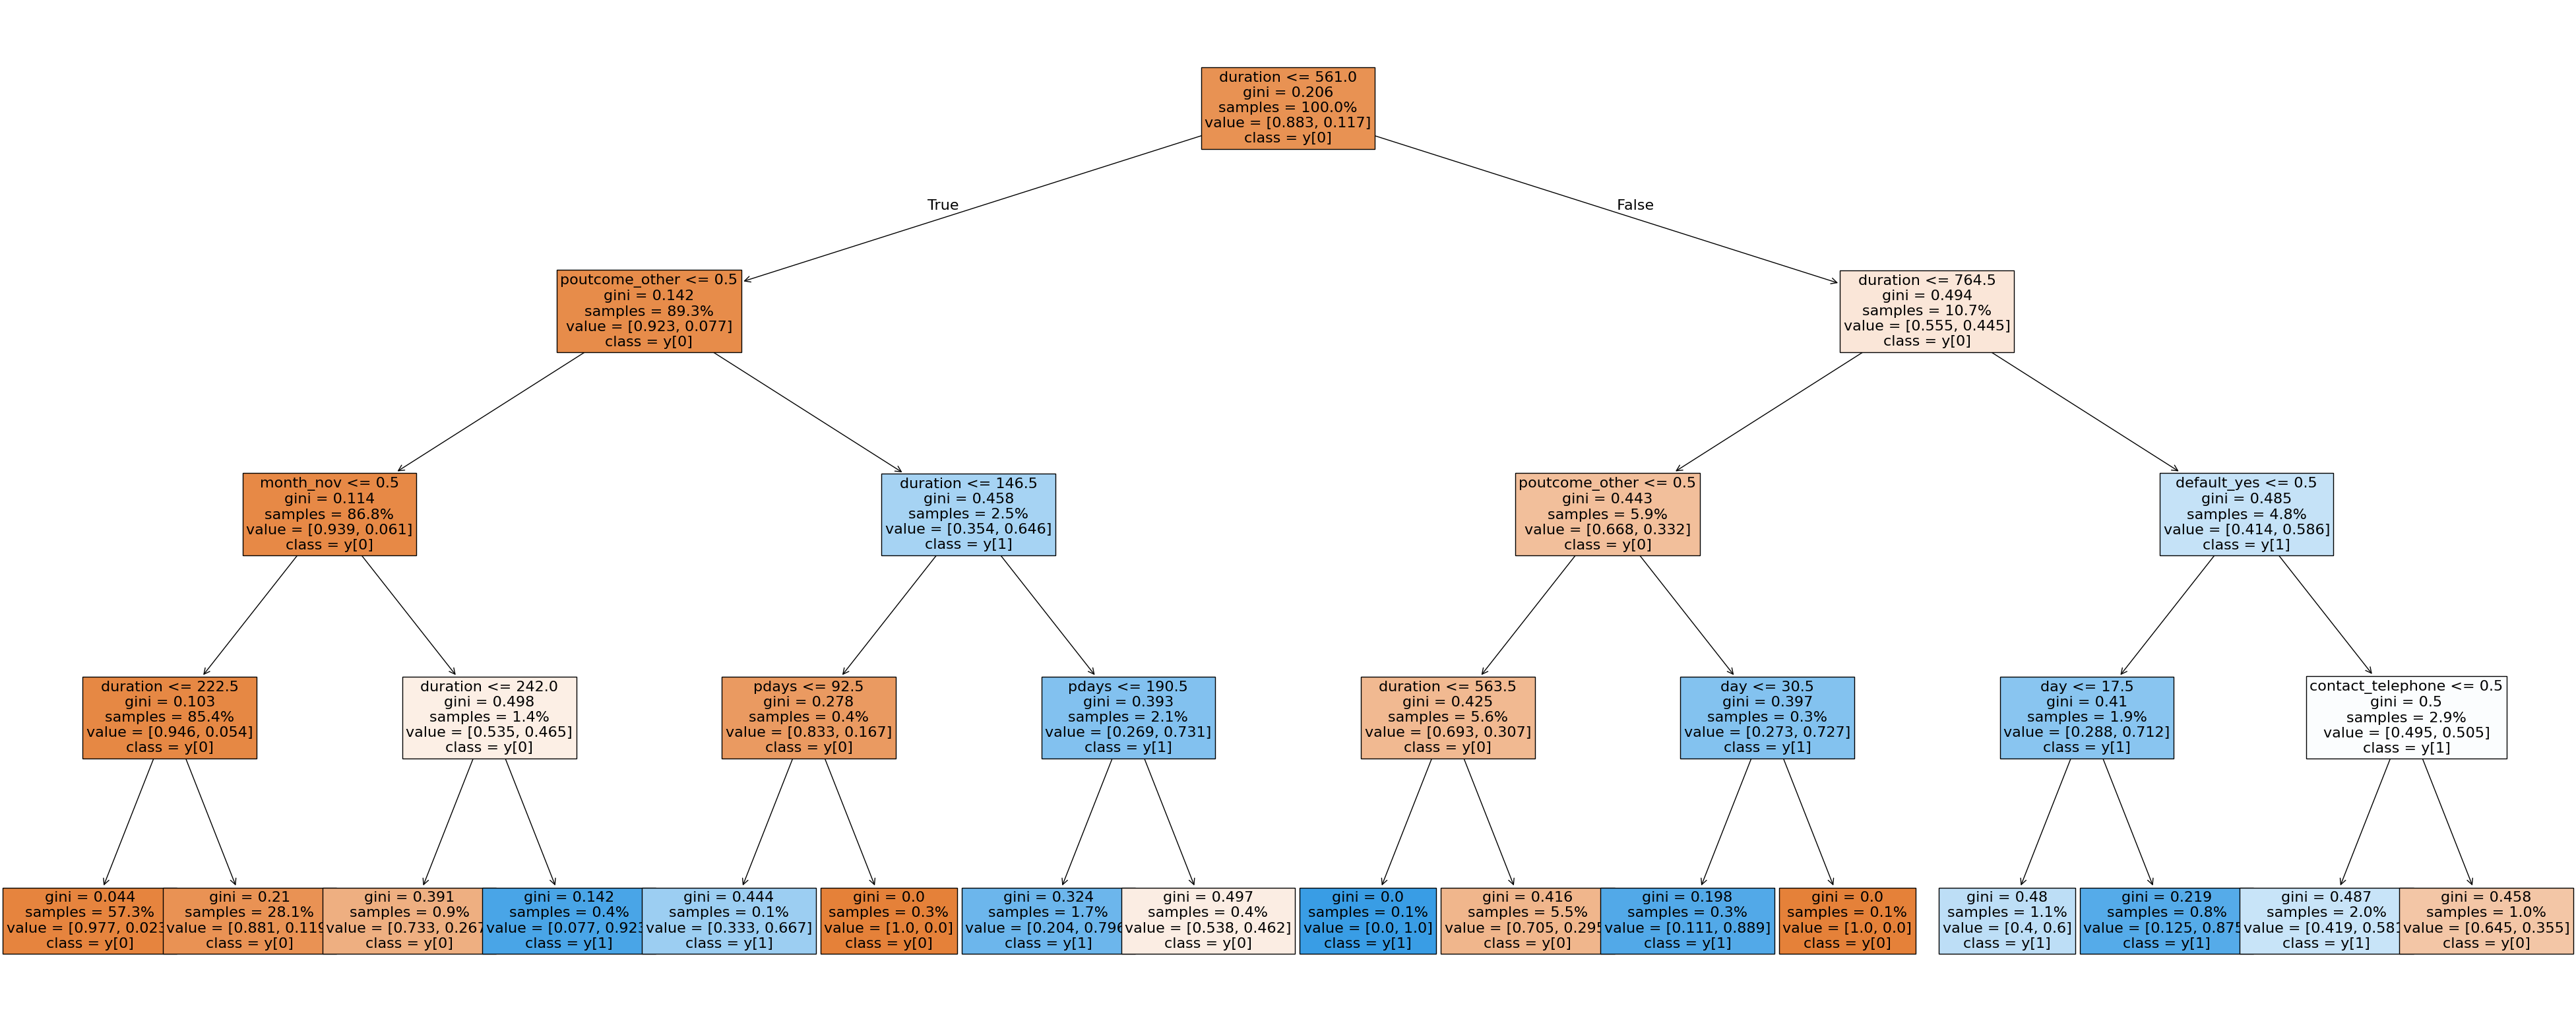

In [79]:
plt.figure(figsize=(50,20))
tree.plot_tree(clf,feature_names=names_of_features,class_names=True,proportion=True, filled=True, fontsize=16)

[Text(0.7226758489417938, 0.9821428571428571, 'duration <= 561.0\ngini = 0.206\nsamples = 100.0%\nvalue = [0.883, 0.117]\nclass = y[0]'),
 Text(0.5869893404431725, 0.9464285714285714, 'poutcome_other <= 0.5\ngini = 0.142\nsamples = 89.3%\nvalue = [0.923, 0.077]\nclass = y[0]'),
 Text(0.6548325946924831, 0.9642857142857142, 'True  '),
 Text(0.4974096718035068, 0.9107142857142857, 'month_nov <= 0.5\ngini = 0.114\nsamples = 86.8%\nvalue = [0.939, 0.061]\nclass = y[0]'),
 Text(0.3685132587883289, 0.875, 'duration <= 222.5\ngini = 0.103\nsamples = 85.4%\nvalue = [0.946, 0.054]\nclass = y[0]'),
 Text(0.21279792392269345, 0.8392857142857143, 'month_jun <= 0.5\ngini = 0.044\nsamples = 57.3%\nvalue = [0.977, 0.023]\nclass = y[0]'),
 Text(0.18630062145735163, 0.8035714285714286, 'age <= 20.0\ngini = 0.038\nsamples = 56.7%\nvalue = [0.98, 0.02]\nclass = y[0]'),
 Text(0.17154954585808918, 0.7678571428571429, 'campaign <= 2.5\ngini = 0.444\nsamples = 0.1%\nvalue = [0.333, 0.667]\nclass = y[1]'),
 T

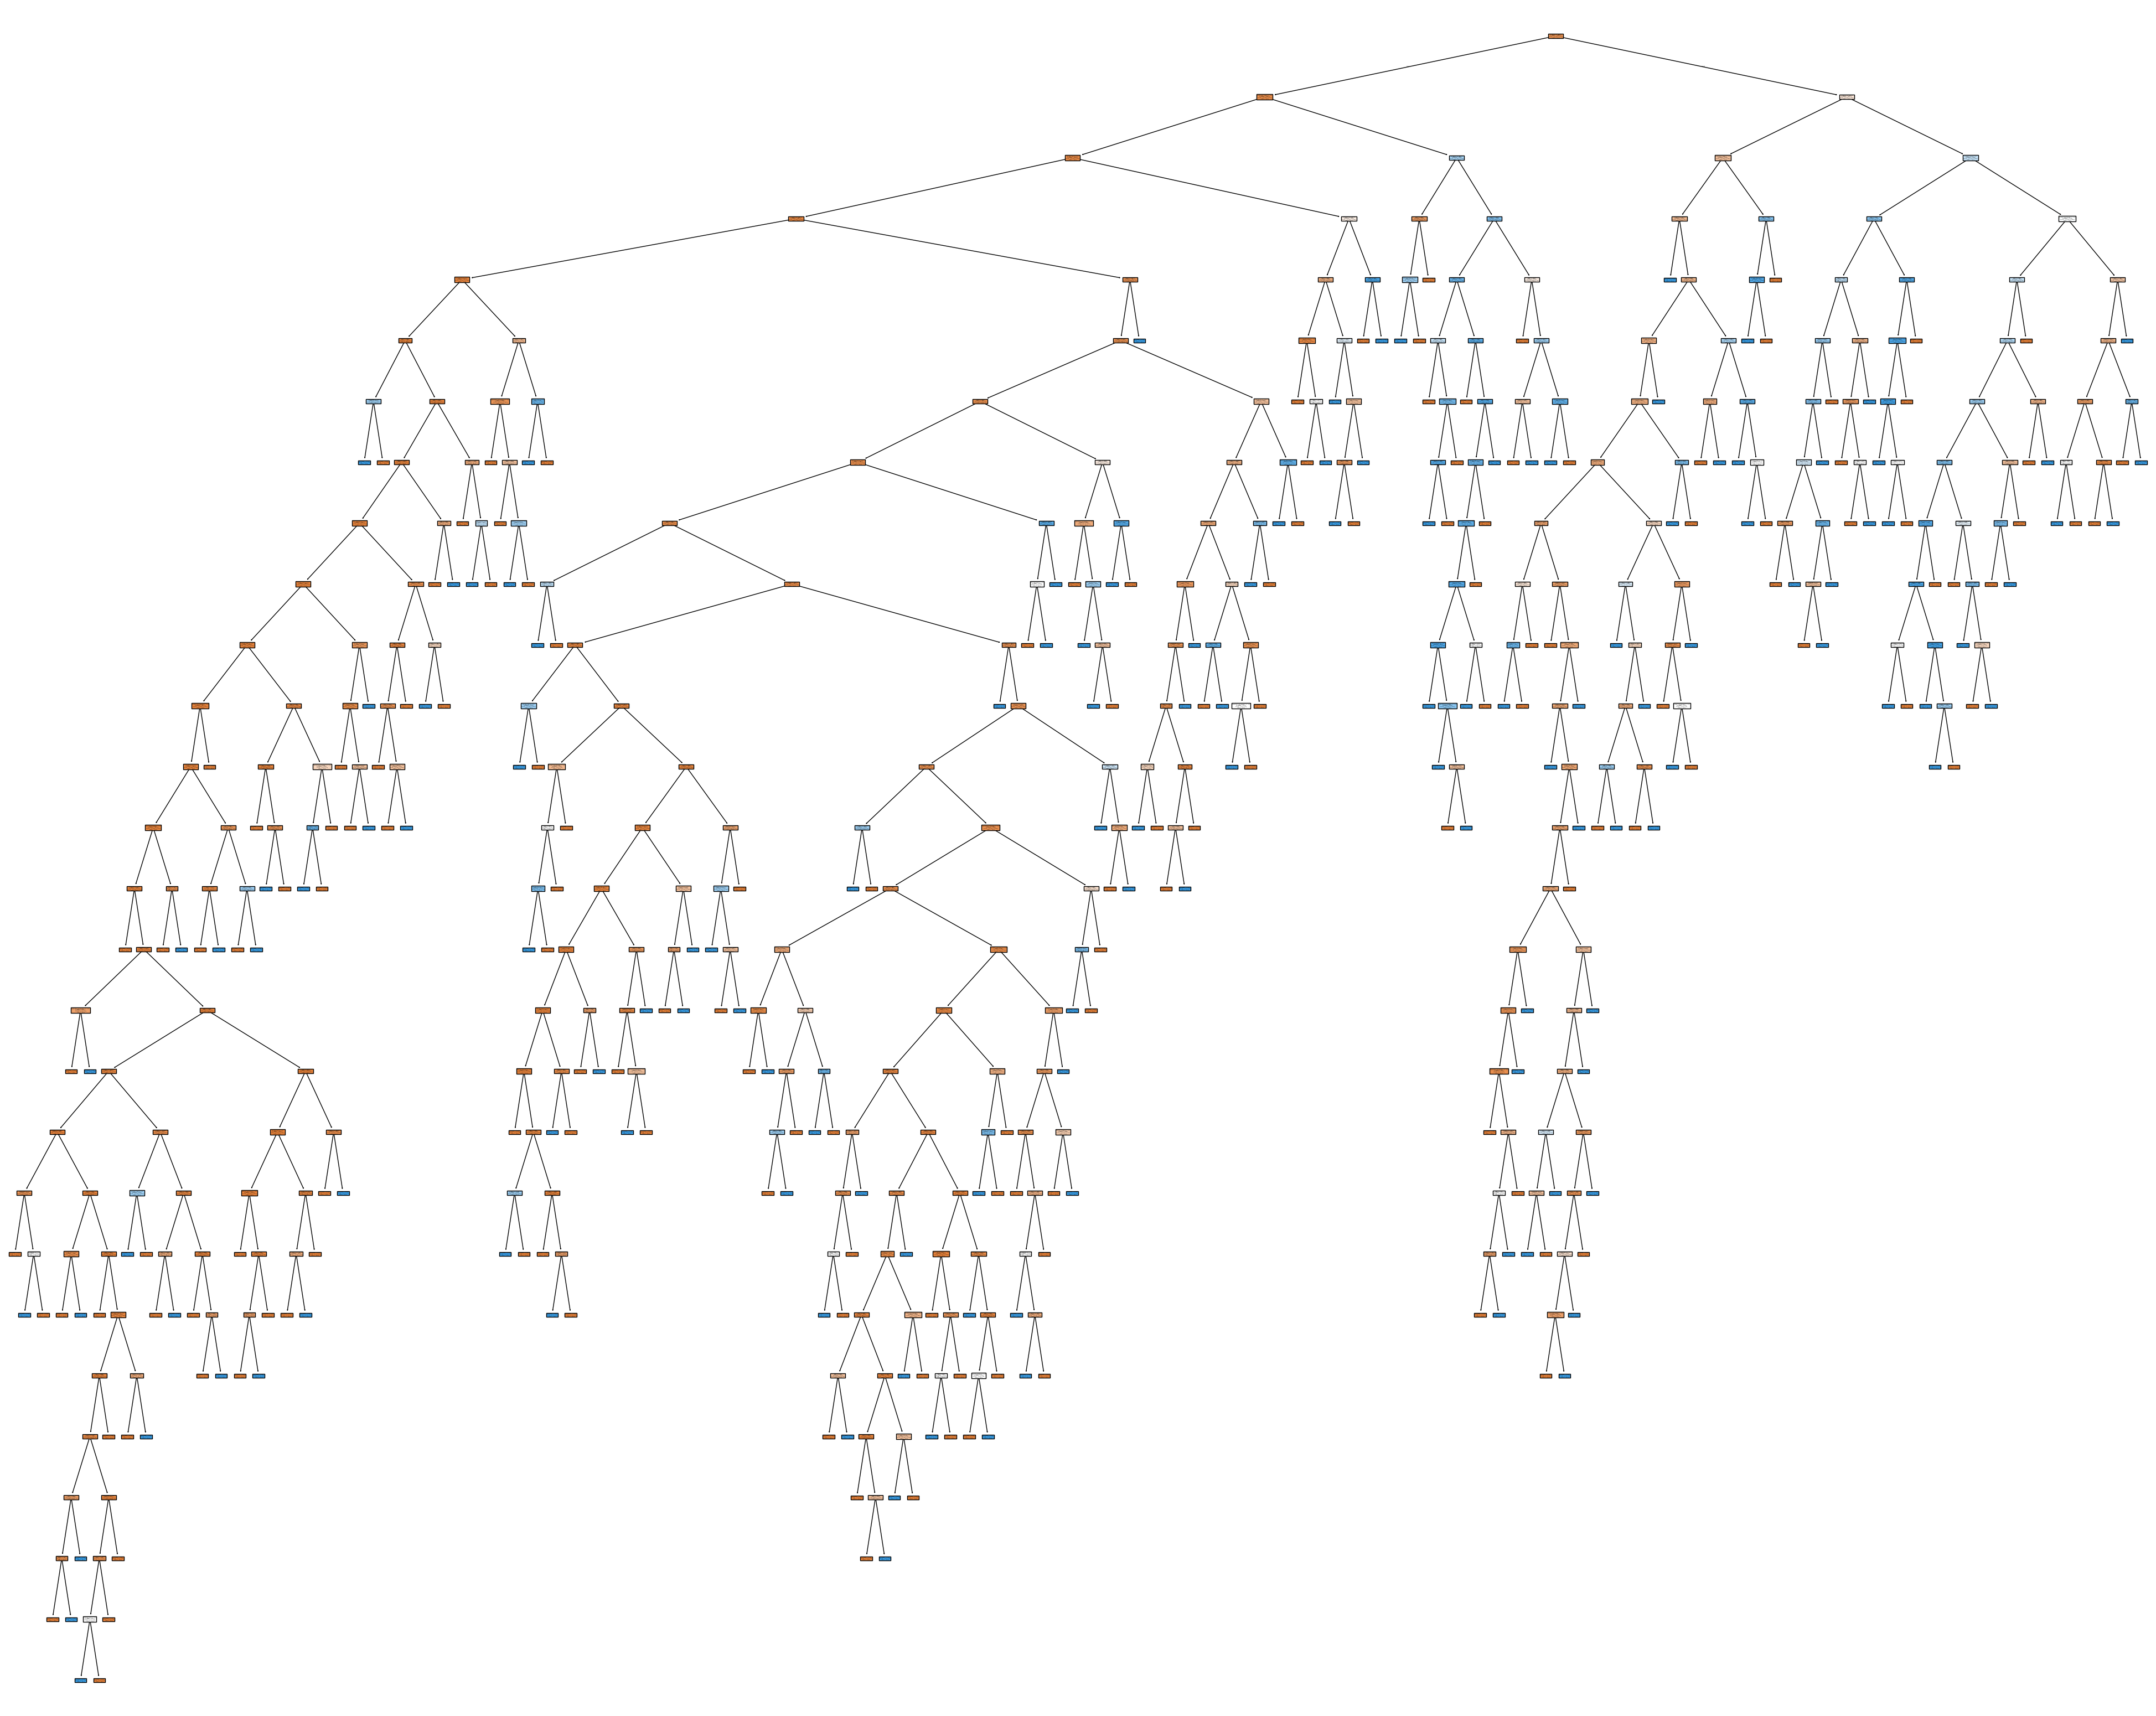

In [82]:
plt.figure(figsize=(50,40))
clf1.fit(x_train, y_train)
tree.plot_tree(clf1,feature_names=names_of_features,class_names=True,proportion=True, filled=True)

We will perform the prediction on the whole decision tree as the truncated one was just for ease of visualization

In [83]:
y_pred = clf.predict(x_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the Decision Tree Classifier is {accuracy*100:.2f} %")

The accuracy of the Decision Tree Classifier is 89.61 %


In [96]:
c_report = classification_report(y_test, y_pred)
print(c_report)

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      1205
         yes       0.56      0.33      0.41       152

    accuracy                           0.90      1357
   macro avg       0.74      0.65      0.68      1357
weighted avg       0.88      0.90      0.88      1357



Plotting a confusion matrix for a more detailed breakdown of a classifier's performance

[[1166   39]
 [ 102   50]]


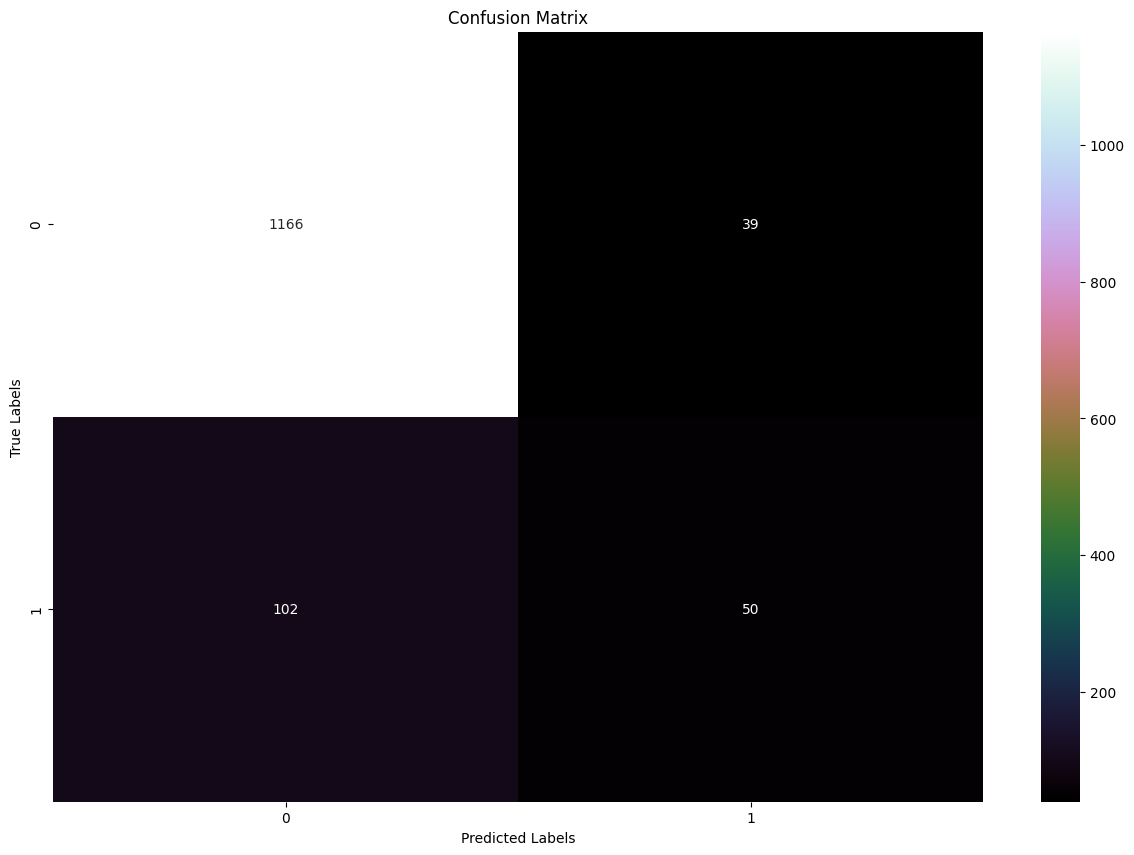

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cubehelix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()